In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.api import het_breuschpagan as bp_test
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.sandwich_covariance import cov_hc0
import scipy.stats as stats

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

In [3]:
# import data
hdb = pd.read_csv('data/hdb_final_dataset.csv')

In [4]:
hdb["price"] = hdb["adjusted_resale_price"]
hdb["area"] = hdb["floor_area_sqm"]


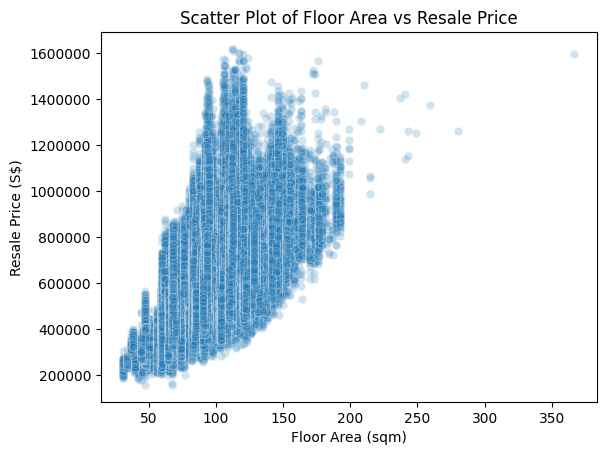

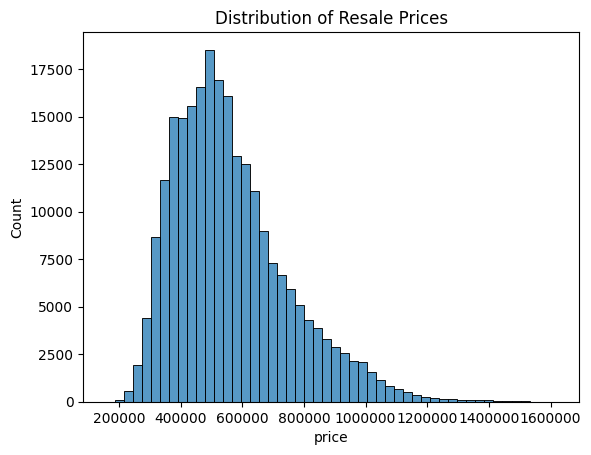

In [25]:
# Scatter: area vs price
sns.scatterplot(data=hdb, x="area", y="price", alpha=0.2)
plt.title("Scatter Plot of Floor Area vs Resale Price")
plt.xlabel("Floor Area (sqm)")
plt.ylabel("Resale Price (S$)")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

# Histogram of price
sns.histplot(hdb["price"], bins=50)
plt.title("Distribution of Resale Prices")
plt.ticklabel_format(style='plain', axis='x')
plt.show()


In [ ]:
# Simple Linear Regression (OLS)
model_simple = smf.ols("price ~ area", data=hdb).fit()
print(model_simple.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                 1.544e+05
Date:                Tue, 25 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:40:55   Log-Likelihood:            -3.1775e+06
No. Observations:              238802   AIC:                         6.355e+06
Df Residuals:                  238800   BIC:                         6.355e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   9.061e+04   1235.273     73.351      0.0

In [9]:
# Multiple Linear Regression
model_multi = smf.ols(
    "price ~ area + remaining_lease + storey_median",
    data=hdb
).fit()

print(model_multi.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                 9.856e+04
Date:                Mon, 01 Dec 2025   Prob (F-statistic):               0.00
Time:                        23:04:59   Log-Likelihood:            -3.1408e+06
No. Observations:              238802   AIC:                         6.282e+06
Df Residuals:                  238798   BIC:                         6.282e+06
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -1.442e+05   1634.454    -

In [13]:
#Polynomial Regression

model_poly = smf.ols("price ~ area + I(area**2)", data=hdb).fit()
print(model_poly.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                 7.763e+04
Date:                Tue, 25 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:41:56   Log-Likelihood:            -3.1772e+06
No. Observations:              238802   AIC:                         6.354e+06
Df Residuals:                  238799   BIC:                         6.354e+06
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     9667.4470   3714.057      2.603   

In [14]:
#Log-Linear Model

df_filtered = hdb[(hdb["price"] > 0) & (hdb["area"] > 0)]

# log-log
model_loglog = smf.ols("np.log(price) ~ np.log(area)", data=df_filtered).fit()
print(model_loglog.summary())

# log-level
model_loglevel = smf.ols("np.log(price) ~ area", data=df_filtered).fit()
print(model_loglevel.summary())


                            OLS Regression Results                            
Dep. Variable:          np.log(price)   R-squared:                       0.473
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                 2.141e+05
Date:                Tue, 25 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:42:24   Log-Likelihood:                 10233.
No. Observations:              238802   AIC:                        -2.046e+04
Df Residuals:                  238800   BIC:                        -2.044e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        9.3258      0.008   1115.757   

In [15]:
# Heteroskedasticity Test + Robust Standard Errors

bp = het_breuschpagan(model_multi.resid, model_multi.model.exog)
labels = ["LM Statistic", "LM p-value", "F Statistic", "F p-value"]
print(dict(zip(labels, bp)))


{'LM Statistic': np.float64(18739.49025727834), 'LM p-value': np.float64(0.0), 'F Statistic': np.float64(322.69535454660416), 'F p-value': np.float64(0.0)}


In [16]:
#Robust SE 

print(model_multi.get_robustcov_results(cov_type='HC1').summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.798
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                 1.140e+04
Date:                Tue, 25 Nov 2025   Prob (F-statistic):               0.00
Time:                        17:49:37   Log-Likelihood:            -3.0462e+06
No. Observations:              238802   AIC:                         6.092e+06
Df Residuals:                  238738   BIC:                         6.093e+06
Df Model:                          63                                         
Covariance Type:                  HC1                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

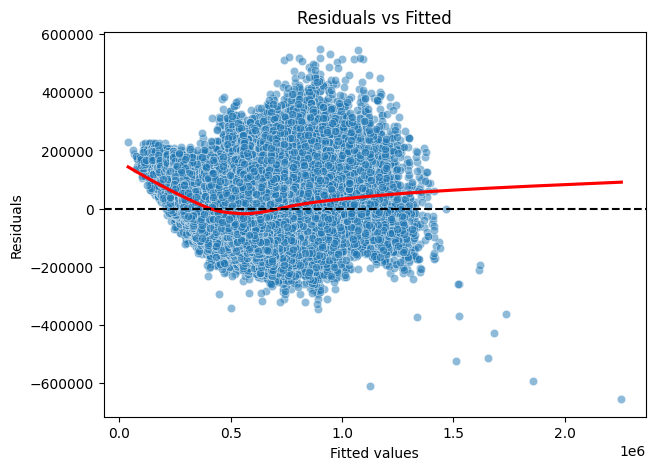

In [ ]:
# Diagnostic Plots

# Residual vs Fitted (takes very long to load)

fitted = model_multi.fittedvalues
residuals = model_multi.resid

plt.figure(figsize=(7,5))
sns.scatterplot(x=fitted, y=residuals, alpha=0.5)
sns.regplot(x=fitted, y=residuals, scatter=False, color='red', lowess=True)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()



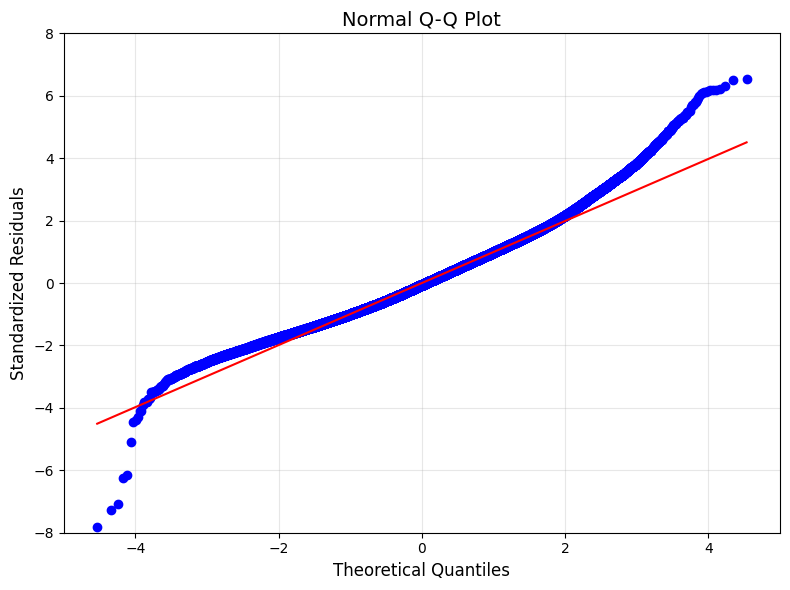

In [31]:
# Create Q-Q plot
fig, ax = plt.subplots(figsize=(8, 6))

# Get standardized residuals
residuals = model_multi.resid
standardized_residuals = (residuals - residuals.mean()) / residuals.std()

# Create Q-Q plot
stats.probplot(standardized_residuals, dist="norm", plot=ax)

# Set axis limits
ax.set_xlim(-5, 5)
ax.set_ylim(-8, 8)

# Customize labels (to match R style)
ax.set_xlabel("Theoretical Quantiles", fontsize=12)
ax.set_ylabel("Standardized Residuals", fontsize=12)
ax.set_title("Normal Q-Q Plot", fontsize=14)

# Add grid
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [10]:
# Nonlinear Model (Interaction terms)
# Interaction between area and town, using log price

model_interact = smf.ols("price ~ area + remaining_lease + area:remaining_lease", data = hdb).fit(cov_type= 'HC1')
print(model_interact.summary())



                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.455
Model:                            OLS   Adj. R-squared:                  0.455
Method:                 Least Squares   F-statistic:                 9.906e+04
Date:                Mon, 01 Dec 2025   Prob (F-statistic):               0.00
Time:                        23:30:03   Log-Likelihood:            -3.1646e+06
No. Observations:              238802   AIC:                         6.329e+06
Df Residuals:                  238798   BIC:                         6.329e+06
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -2.591e+05 

In [14]:
# Fixed Effects Model

df_fe = hdb.copy()
df_fe = df_fe.reset_index().set_index(["town", "index"])
y = np.log(df_fe["price"])

X = df_fe[["area", "remaining_lease"]] #regressors
X = sm.add_constant(X)

from linearmodels.panel import PanelOLS, PooledOLS, RandomEffects # (install linearmodels)
panel = PanelOLS(y, X, entity_effects= True) # town fixed effects
fe_resid = panel.fit(cov_type = "clustered", cluster_entity = True)
print(fe_resid.summary)
fe_resid.params['remaining_lease']



                          PanelOLS Estimation Summary                           
Dep. Variable:                  price   R-squared:                        0.7494
Estimator:                   PanelOLS   R-squared (Between):             -1.6478
No. Observations:              238802   R-squared (Within):               0.7494
Date:                Tue, Dec 02 2025   R-squared (Overall):              0.4837
Time:                        00:22:51   Log-likelihood                 1.124e+05
Cov. Estimator:             Clustered                                           
                                        F-statistic:                   3.571e+05
Entities:                          26   P-value                           0.0000
Avg Obs:                       9184.7   Distribution:                F(2,238774)
Min Obs:                       586.00                                           
Max Obs:                    1.924e+04   F-statistic (robust):             679.70
                            

np.float64(0.011098137431002946)

In [43]:
# Random Forest (feature selection)

X_rf = pd.get_dummies(hdb[["area", "remaining_lease", "town", "flat_model", "storey_range", "min_dist_sch", "min_dist_cbd", "min_dist_mrt"]], drop_first= True)
y = hdb['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
rf = RandomForestRegressor(n_estimators = 200, max_depth= 8, random_state=42, n_jobs= -1)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

feature_impt = pd.Series(rf.feature_importances_, index = X.columns).sort_values(ascending=False).head(20)
print(feature_impt)



area               0.835222
remaining_lease    0.164778
const              0.000000
dtype: float64


In [47]:
# LASSO

X_lasso = pd.get_dummies(hdb[["area", "remaining_lease", "town", "flat_model", "storey_range", "min_dist_sch", "min_dist_cbd", "min_dist_mrt"]], drop_first= True)
y = hdb['price'].values
scaler = StandardScaler()
Xs = scaler.fit_transform(X)

lasso = LassoCV(cv = 5, random_state=42, n_jobs=-1).fit(Xs, y)
coeff_lasso = pd.Series(lasso.coef_, index= X.columns)
print('Nonzero coefficients:')
print(coeff_lasso[coeff_lasso != 0].sort_values(ascending = False))

Nonzero coefficients:
area               101101.075429
remaining_lease     37783.023354
dtype: float64
